In [1]:
# To load data into python:
from astropy.io import fits
import numpy as np
#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Fall 2017\Data\munn_giants.fits',1)

In [2]:
# list of columns
phot.columns

ColDefs(
    name = 'OBJID'; format = 'K'
    name = 'FIELD'; format = '12A'
    name = 'NIGHT'; format = '7A'
    name = 'IMAGE'; format = 'J'
    name = 'CHIP'; format = 'J'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'G'; format = 'E'
    name = 'GERR'; format = 'E'
    name = 'R'; format = 'E'
    name = 'RERR'; format = 'E'
    name = 'I'; format = 'E'
    name = 'IERR'; format = 'E'
    name = 'RAWD'; format = 'E'
    name = 'RAWDERR'; format = 'E'
    name = 'D'; format = 'E'
    name = 'DERR'; format = 'E'
    name = 'AG'; format = 'E'
    name = 'AR'; format = 'E'
    name = 'AI'; format = 'E'
    name = 'AD'; format = 'E'
    name = 'GI0CORR'; format = 'E'
    name = 'GD0CORR'; format = 'E'
    name = 'DELTA_GD'; format = 'E'
    name = 'GISHIFT'; format = 'E'
    name = 'GDSHIFT'; format = 'E'
    name = 'MT'; format = 'E'
    name = 'MD'; format = 'E'
    name = 'MT0'; format = 'E'
    name = 'MD0'; format = 'E'
    name = 'MT0CORR'; format = 'E'

In [3]:
# access single column
phot['dec']

array([  2.4065202 ,   2.52932887,   2.30321591, ...,  12.48063147,
        12.28809465,  12.28358517])

In [4]:
# can also subscript
phot['ra'][50:2000]

array([ 334.3731252 ,  334.14284888,  333.88572058, ...,   83.02598644,
         83.45971661,   83.62613393])

In [5]:
#Import calibration data and define variable spec
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Fall 2017\Data\Ho2017_Catalog.fits',1)

In [6]:
#Cross-matching
from astropy.coordinates import SkyCoord
from astropy import units as u

#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['ra']*u.degree,dec=phot['dec']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['Dec']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec < .1)

#New variable for different spectroscopic data set
spec2 = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Fall 2017\Data\ssppOut-dr10.fits.gz',1)
c_spec2=SkyCoord(ra=spec2['plug_ra']*u.degree,dec=spec2['plug_dec']*u.degree)
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec2) 
good=(d2d.arcsec < .1)

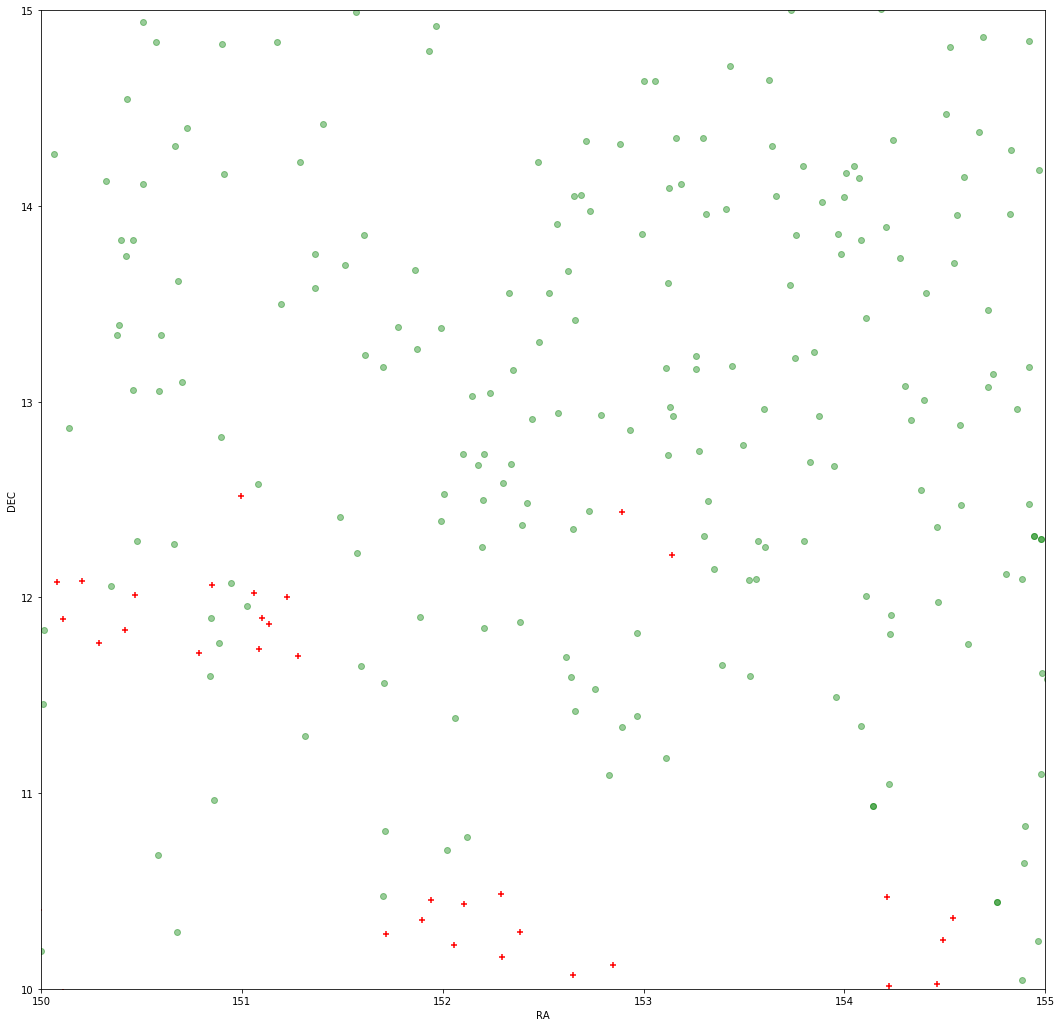

In [7]:
#Plotting RA vs. DEC
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
plt.scatter(spec['ra'],spec['dec'],marker='o',c='green',alpha=0.4)
plt.scatter(phot['ra'],phot['dec'],marker='+',c='red')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.xlim(150.0,155.0)
plt.ylim(10.0,15.0)
plt.show()

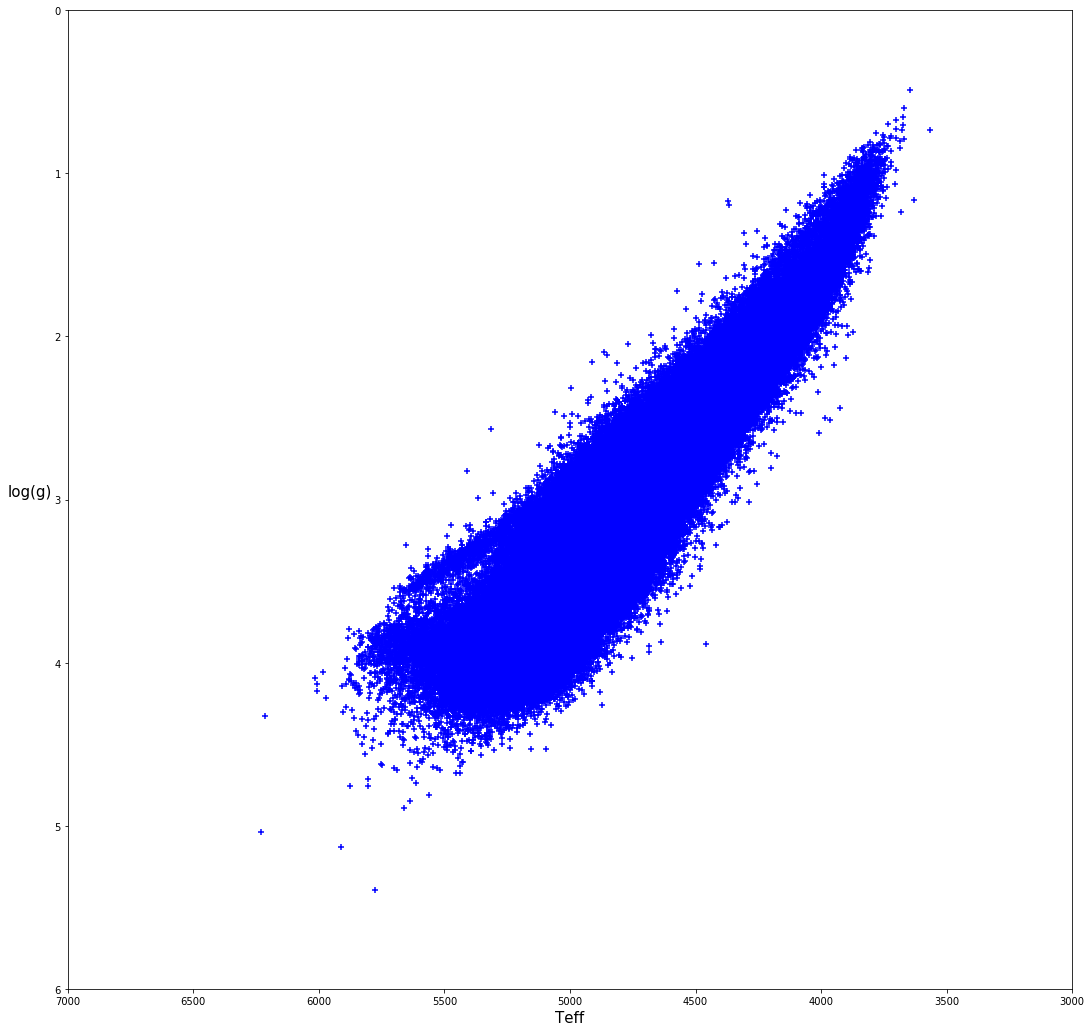

In [9]:
#Plotting logg VS. Teff from ho2017 Data
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
plt.scatter(spec['Teff'],spec['logg'],marker='+',c='blue')
plt.xlabel('Teff',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=15)
plt.xlim(3000,7000)
plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.show()